# Importar librerias 

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.evaluate import bias_variance_decomp
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Cargar datos 

Se utilizaron datos de kaggle: https://www.kaggle.com/code/seowkhaiwen/cardiovascular-analysis/data

Son 70,000 registros sobre características de personas que tienen o no alguna enfermedad cardiovascular.

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/Nancy2405/UsoBiblioteca_Clasificacion/main/cardio_train.csv',sep=";")

In [3]:
data=data.drop(columns=["id"])

# Exploración de la base de datos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [5]:
data.shape

(70000, 12)

In [6]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [80]:
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


Se hicieron boxplots para identificar si existían datos atípicos

Text(0.5, 0.98, 'Boxplots Features')

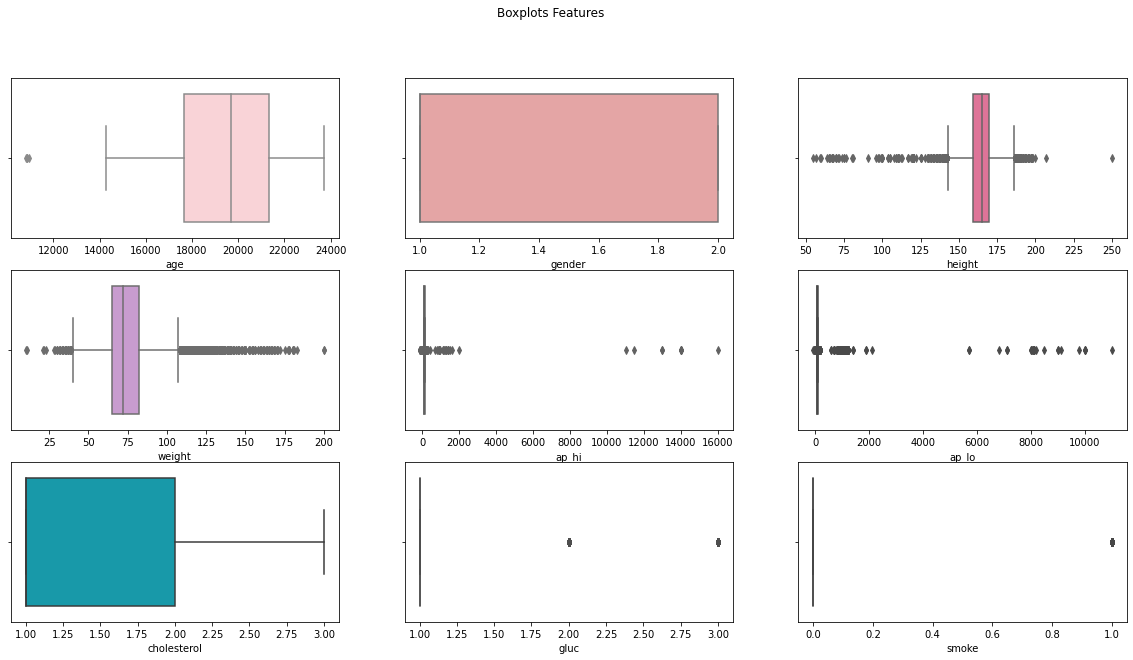

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(20,10))
sns.boxplot(x=data["age"],ax=axes[0,0],color='#ffcdd2')
sns.boxplot(x=data["gender"],ax=axes[0,1],color='#ef9a9a')
sns.boxplot(x=data["height"],ax=axes[0,2],color='#f06292')
sns.boxplot(x=data["weight"],ax=axes[1,0],color='#ce93d8')
sns.boxplot(x=data["ap_hi"],ax=axes[1,1],color='#9575cd')
sns.boxplot(x=data["ap_lo"],ax=axes[1,2],color='#03a9f4')
sns.boxplot(x=data["cholesterol"],ax=axes[2,0],color='#00acc1')
sns.boxplot(x=data["gluc"],ax=axes[2,1],color='#4db6ac')
sns.boxplot(x=data["smoke"],ax=axes[2,2],color='#1976d2')



fig.suptitle('Boxplots Features')

# Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).

In [7]:
X=data.iloc[:,0:-1]

In [8]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [9]:
y=data.cardio

Se dividieron los datos para tener un set de entrenamiento del 80%, uno de validación de 10% y otro de test también del 10%

In [10]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8,random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)

In [11]:
X_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
47339,21876,1,154,80.0,130,90,2,1,0,0,1
67456,16717,2,162,70.0,140,90,1,1,0,0,0
12308,21128,2,174,92.0,150,100,1,1,0,0,1
32557,23366,2,173,76.0,120,82,1,1,0,0,1
664,20281,1,160,60.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
37194,16001,2,170,75.0,150,80,1,1,1,0,1
6265,23209,2,162,73.0,160,90,1,1,0,0,1
54886,23589,1,169,74.0,120,80,1,1,0,0,1
860,18227,1,167,70.0,120,80,1,1,0,0,0


In [12]:
X_valid

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
49935,21846,1,155,68.0,120,80,1,1,0,0,1
63854,17629,1,163,65.0,110,80,1,1,0,0,1
2549,16673,1,151,72.0,90,60,1,1,0,0,1
56672,21861,1,162,74.0,120,80,1,1,0,0,0
26698,18088,2,180,90.0,180,100,2,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3416,19025,2,180,80.0,120,80,1,1,0,1,0
21093,17516,2,171,124.0,160,100,1,1,1,0,1
53262,20488,1,157,70.0,140,90,3,1,0,0,1
30166,15294,1,155,48.0,100,70,1,1,0,0,1


In [13]:
X_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
10538,18169,2,167,70.0,100,70,1,1,0,0,1
4883,18065,2,165,67.0,120,80,1,1,0,0,1
56618,14626,1,166,67.0,120,80,1,1,0,0,1
45812,23264,1,170,53.0,140,80,3,3,0,0,1
48959,20281,1,168,112.0,140,1000,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
508,22737,1,166,76.0,120,80,1,1,0,0,1
41064,19948,1,167,76.0,120,80,1,1,0,0,1
67978,21247,2,174,78.0,180,110,3,1,1,0,1
39507,23291,1,165,99.0,140,90,2,1,0,0,1


# Creación del modelo

In [28]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

# Predicciones con el conjunto de prueba  y evaluación 

In [39]:
predicciones=clf.predict(X_test)

In [40]:
accuracy=accuracy_score(predicciones,y_test)

In [41]:
accuracy

0.7178571428571429

In [43]:
confusion_matrix(predicciones,y_test)

array([[2547, 1023],
       [ 952, 2478]], dtype=int64)

Podemos observar que el accuracy es de 0.71, lo que nos indica que el modelo no es tan malo, pero que claramente aún puede mejorar mucho. 

# Predicciones con el conjunto de validación y evaluación

In [44]:
predicciones_valid=clf.predict(X_valid)
accuracy_valid=accuracy_score(predicciones_valid,y_valid)

In [45]:
accuracy_valid

0.7084285714285714

In [46]:
confusion_matrix(predicciones_valid,y_test)

array([[1797, 1799],
       [1702, 1702]], dtype=int64)

Podemos observar que el accuracy fue muy parecido al del conjunto de prueba, por lo que en realidad el modelo no está sobreajustado, pues aún cuando está viendo datos muy distintos a los de entrenamiento, el modelo funciona bien, sin embargo eso no significa que ya sea óptimo para utilizarse.

# Diagnóstico y explicación el grado de bias o sesgo y varianza

En este caso tenemos 10 variables distintas, todas númericas, algunas binarias y otras continuas, esto hace que no sea posible visibilizar el sesgo ni la varianza, pues necesitariamos tener solamente 2 variables para poder hacer una gráfica del comportamiento. Sin embargo es posible calcular ciertos coeficientes que ayuden a medir si existe o no sesgo y varianza.

In [ ]:
#Con el conjunto de prueba
avg_expected_loss_1, avg_bias_1, avg_var_1 = bias_variance_decomp(
        clf, X_train.values, y_train.values, X_test.values, y_test.values, 
        loss='0-1_loss',
        random_seed=123)

In [ ]:
print('Average expected loss: %.3f' % avg_expected_loss_1)
print('Average bias: %.3f' % avg_bias_1)
print('Average variance: %.3f' % avg_var_1)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,predicciones))

In [ ]:
#Con el conjunto de validación
avg_expected_loss_2, avg_bias_2, avg_var_2 = bias_variance_decomp(
        clf, X_train.values, y_train.values, X_valid.values, y_valid.values, 
        loss='0-1_loss',
        random_seed=123)

In [ ]:
print('Average expected loss: %.3f' % avg_expected_loss_2)
print('Average bias: %.3f' % avg_bias_2)
print('Average variance: %.3f' % avg_var_2)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_valid))

# Diagnóstico y explicación el nivel de ajuste del modelo: underfitt fitt overfitt

Gracias a estas evaluaciones podemos decir que nuestro modelo tiene under fitting, ya que no se ajusta lo suficiente a los datos, pues a pesar de que si aprende, aún no generaliza de la forma correcta.

# Utiliza técnicas de regularización o ajuste de parámetros para mejorar el desempeño de tu modelo

Para mejorar el desempeño del modelo, se realizó experimentación con los hiperparámetrps

In [76]:
clf_2=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 300, max_depth=10, criterion='gini')

In [77]:
clf_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [78]:
pred_2=clf_2.predict(X_test)

In [79]:
print("Accuracy: ",accuracy_score(y_test,pred_2))

Accuracy:  0.7435714285714285


Ahora nuestro accuracy mejoró en casi 0.5 puntos, por lo podemos decir que la experimentación funcionó. 

In [ ]:
avg_expected_loss_3, avg_bias_3, avg_var_3 = bias_variance_decomp(clf, X_train.values, y_train.values, X_test.values, y_test.values, loss='0-1_loss',random_seed=123)

In [ ]:
print('Average expected loss: %.3f' % avg_expected_loss_1)
print('Average bias: %.3f' % avg_bias_1)
print('Average variance: %.3f' % avg_var_1)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,pred_2))

Con este modelo ahora podemos ver como se han reducido un poco el bias y la varianza. 